# 승리 예측 모델링

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
match = pd.read_csv("C:\\Users\\jys72\\OneDrive\\문서\\카카오톡 받은 파일\\match_cleaned.csv")

### matchid, 챔프명, 포지션 삭제

In [108]:
match = match.iloc[:,21:]

In [109]:
match

,totalGold_100_1,totalGold_100_2,totalGold_100_3,totalGold_100_4,totalGold_100_5,totalGold_200_6,totalGold_200_7,totalGold_200_8,totalGold_200_9,totalGold_200_10,...,player2magicdamage,player3magicdamage,player4magicdamage,player5magicdamage,player6magicdamage,player7magicdamage,player8magicdamage,player9magicdamage,player10magicdamage,winteam
0,4303.0,4372.0,5386.0,7340.0,4647.0,6945.0,7446.0,6859.0,6065.0,5036.0,...,2855.0,489.0,0.0,3382.0,8017.0,1577.0,4515.0,1453.0,4965.0,[100]
1,6348.0,4363.0,7401.0,5494.0,4191.0,4358.0,6521.0,4947.0,6469.0,7056.0,...,0.0,1950.0,723.0,4491.0,2548.0,4958.0,4583.0,2889.0,6351.0,[100]
2,4667.0,5903.0,5073.0,5506.0,4790.0,5334.0,5651.0,7160.0,5787.0,5640.0,...,1518.0,4227.0,1143.0,3292.0,2894.0,219.0,5690.0,579.0,278.0,[200]
3,5934.0,5236.0,7277.0,5958.0,3877.0,5882.0,4906.0,4495.0,5769.0,3738.0,...,4008.0,1384.0,1270.0,1326.0,5847.0,562.0,6563.0,191.0,1803.0,[100]
4,5452.0,4778.0,4981.0,5221.0,4010.0,5691.0,5401.0,6122.0,6684.0,4556.0,...,1370.0,2563.0,367.0,1959.0,0.0,0.0,7366.0,4160.0,2344.0,[200]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37875,6341.0,5112.0,6704.0,5441.0,4150.0,4550.0,4988.0,4691.0,4848.0,4007.0,...,1111.0,9242.0,300.0,276.0,0.0,219.0,4060.0,472.0,3016.0,[100]
37876,6484.0,6972.0,5851.0,5887.0,4492.0,5631.0,6736.0,6148.0,6293.0,4669.0,...,5729.0,1545.0,802.0,1985.0,0.0,393.0,8712.0,232.0,2603.0,[100]
37877,5525.0,5775.0,6069.0,6626.0,5414.0,8327.0,6183.0,6419.0,6372.0,4259.0,...,306.0,1693.0,338.0,7929.0,991.0,6184.0,8008.0,0.0,2187.0,[200]
37878,5971.0,7730.0,5909.0,5033.0,4566.0,5614.0,6051.0,3807.0,6284.0,4620.0,...,4949.0,8175.0,920.0,4374.0,1729.0,6822.0,1325.0,1847.0,5279.0,[200]


### 팀별 골드차

In [110]:
# 각 열과 n+5열의 차를 계산하여 새로운 변수로 저장
match['top_gold_gap'] = match.iloc[:, 0] - match.iloc[:, 5]
match['jungle_gold_gap'] = match.iloc[:, 1] - match.iloc[:, 6]
match['mid_gold_gap'] = match.iloc[:, 2] - match.iloc[:, 7]
match['ad_gold_gap'] = match.iloc[:, 3] - match.iloc[:, 8]
match['utility_gold_gap'] = match.iloc[:, 4] - match.iloc[:, 9]

In [111]:
match['team_gold_gap'] = match[['top_gold_gap', 'jungle_gold_gap', 'mid_gold_gap', 'ad_gold_gap', 'utility_gold_gap']].sum(axis=1)

### 팀별 레벨차

In [112]:
match = match.iloc[:,10:]

In [113]:
match

,level_100_1,level_100_2,level_100_3,level_100_4,level_100_5,level_200_6,level_200_7,level_200_8,level_200_9,level_200_10,...,player8magicdamage,player9magicdamage,player10magicdamage,winteam,top_gold_gap,jungle_gold_gap,mid_gold_gap,ad_gold_gap,utility_gold_gap,team_gold_gap
0,9.0,9.0,10.0,9.0,9.0,11.0,9.0,12.0,9.0,8.0,...,4515.0,1453.0,4965.0,[100],-2642.0,-3074.0,-1473.0,1275.0,-389.0,-6303.0
1,11.0,8.0,11.0,9.0,7.0,11.0,9.0,10.0,9.0,9.0,...,4583.0,2889.0,6351.0,[100],1990.0,-2158.0,2454.0,-975.0,-2865.0,-1554.0
2,10.0,9.0,10.0,9.0,8.0,10.0,9.0,11.0,9.0,8.0,...,5690.0,579.0,278.0,[200],-667.0,252.0,-2087.0,-281.0,-850.0,-3633.0
3,11.0,9.0,12.0,9.0,8.0,11.0,9.0,9.0,9.0,8.0,...,6563.0,191.0,1803.0,[100],52.0,330.0,2782.0,189.0,139.0,3492.0
4,10.0,9.0,11.0,8.0,7.0,11.0,9.0,11.0,10.0,7.0,...,7366.0,4160.0,2344.0,[200],-239.0,-623.0,-1141.0,-1463.0,-546.0,-4012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37875,11.0,8.0,11.0,8.0,8.0,9.0,8.0,9.0,8.0,8.0,...,4060.0,472.0,3016.0,[100],1791.0,124.0,2013.0,593.0,143.0,4664.0
37876,10.0,10.0,11.0,8.0,8.0,11.0,9.0,11.0,9.0,7.0,...,8712.0,232.0,2603.0,[100],853.0,236.0,-297.0,-406.0,-177.0,209.0
37877,10.0,8.0,11.0,9.0,8.0,11.0,10.0,11.0,8.0,7.0,...,8008.0,0.0,2187.0,[200],-2802.0,-408.0,-350.0,254.0,1155.0,-2151.0
37878,11.0,9.0,12.0,8.0,8.0,11.0,9.0,10.0,9.0,8.0,...,1325.0,1847.0,5279.0,[200],357.0,1679.0,2102.0,-1251.0,-54.0,2833.0


In [114]:
# 각 열과 n+5열의 차를 계산하여 새로운 변수로 저장
match['top_level_gap'] = match.iloc[:, 0] - match.iloc[:, 5]
match['jungle_level_gap'] = match.iloc[:, 1] - match.iloc[:, 6]
match['mid_level_gap'] = match.iloc[:, 2] - match.iloc[:, 7]
match['ad_level_gap'] = match.iloc[:, 3] - match.iloc[:, 8]
match['utility_level_gap'] = match.iloc[:, 4] - match.iloc[:, 9]

In [115]:
match['team_level_gap'] = match[['top_level_gap', 'jungle_level_gap', 'mid_level_gap', 'ad_level_gap', 'utility_level_gap']].sum(axis=1)

### 팀별 미니언차

In [116]:
match = match.iloc[:,10:]

In [117]:
match

,minionsKilled_100_1,minionsKilled_100_2,minionsKilled_100_3,minionsKilled_100_4,minionsKilled_100_5,minionsKilled_200_6,minionsKilled_200_7,minionsKilled_200_8,minionsKilled_200_9,minionsKilled_200_10,...,mid_gold_gap,ad_gold_gap,utility_gold_gap,team_gold_gap,top_level_gap,jungle_level_gap,mid_level_gap,ad_level_gap,utility_level_gap,team_level_gap
0,62.0,2.0,115.0,114.0,42.0,122.0,3.0,133.0,125.0,27.0,...,-1473.0,1275.0,-389.0,-6303.0,-2.0,0.0,-2.0,0.0,1.0,-3.0
1,102.0,3.0,118.0,96.0,22.0,86.0,6.0,79.0,109.0,24.0,...,2454.0,-975.0,-2865.0,-1554.0,0.0,-1.0,1.0,0.0,-2.0,-2.0
2,79.0,7.0,109.0,122.0,21.0,100.0,3.0,123.0,102.0,16.0,...,-2087.0,-281.0,-850.0,-3633.0,0.0,0.0,-1.0,0.0,0.0,-1.0
3,103.0,4.0,137.0,118.0,26.0,121.0,4.0,89.0,122.0,37.0,...,2782.0,189.0,139.0,3492.0,0.0,0.0,3.0,0.0,0.0,3.0
4,133.0,6.0,136.0,97.0,11.0,105.0,1.0,139.0,130.0,18.0,...,-1141.0,-1463.0,-546.0,-4012.0,-1.0,0.0,0.0,-2.0,0.0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37875,120.0,2.0,117.0,123.0,27.0,76.0,5.0,83.0,94.0,31.0,...,2013.0,593.0,143.0,4664.0,2.0,0.0,2.0,0.0,0.0,4.0
37876,100.0,9.0,102.0,73.0,28.0,120.0,7.0,97.0,116.0,24.0,...,-297.0,-406.0,-177.0,209.0,-1.0,1.0,0.0,-1.0,1.0,0.0
37877,66.0,8.0,96.0,115.0,20.0,119.0,7.0,129.0,99.0,15.0,...,-350.0,254.0,1155.0,-2151.0,-1.0,-2.0,0.0,1.0,1.0,-1.0
37878,116.0,3.0,136.0,92.0,30.0,107.0,19.0,82.0,120.0,17.0,...,2102.0,-1251.0,-54.0,2833.0,0.0,0.0,2.0,-1.0,0.0,1.0


In [118]:
# 새로운 열을 저장할 리스트 생성
new_column_values = []

# 인덱스가 41부터 50인 열을 순회하며 값을 더하여 새로운 열에 저장
for i in range(0, 10):
    new_column_values.append(match.iloc[:, i] + match.iloc[:, i+10])

# 새로운 열을 DataFrame에 추가
for i in range(1, 11):
    match[f'objectkills_{i}'] = new_column_values[i-1]

In [119]:
match.iloc[:,107:]

,objectkills_1,objectkills_2,objectkills_3,objectkills_4,objectkills_5,objectkills_6,objectkills_7,objectkills_8,objectkills_9,objectkills_10
0,64.0,94.0,115.0,114.0,42.0,126.0,73.0,133.0,125.0,27.0
1,102.0,79.0,118.0,96.0,22.0,86.0,90.0,79.0,109.0,24.0
2,79.0,83.0,109.0,122.0,21.0,100.0,83.0,123.0,102.0,16.0
3,103.0,92.0,137.0,118.0,26.0,121.0,82.0,89.0,122.0,37.0
4,133.0,94.0,136.0,97.0,11.0,105.0,97.0,139.0,130.0,18.0
...,...,...,...,...,...,...,...,...,...,...
37875,120.0,71.0,117.0,127.0,27.0,76.0,81.0,83.0,94.0,31.0
37876,102.0,86.0,102.0,73.0,30.0,120.0,75.0,97.0,116.0,24.0
37877,66.0,66.0,96.0,115.0,20.0,123.0,104.0,129.0,99.0,15.0
37878,118.0,93.0,136.0,92.0,30.0,107.0,111.0,82.0,120.0,17.0


In [120]:
# 각 열과 n+5열의 차를 계산하여 새로운 변수로 저장
match['top_object_gap'] = match.iloc[:, 107] - match.iloc[:, 112]
match['jungle_object_gap'] = match.iloc[:, 108] - match.iloc[:, 113]
match['mid_object_gap'] = match.iloc[:, 109] - match.iloc[:, 114]
match['ad_object_gap'] = match.iloc[:, 110] - match.iloc[:, 115]
match['utility_object_gap'] = match.iloc[:, 111] - match.iloc[:, 116]

In [121]:
match['team_object_gap'] = match[['top_object_gap', 'jungle_object_gap', 'mid_object_gap', 'ad_object_gap', 'utility_object_gap']].sum(axis=1)

### 정글몹

In [122]:
match = match.iloc[:,20:]

In [123]:
match

,blue_dragon,blue_firstdragon,blue_HORDE,red_dragon,red_firstdragon,red_HORDE,blue_firstkill,red_firstkill,player1kills,player1assists,...,objectkills_7,objectkills_8,objectkills_9,objectkills_10,top_object_gap,jungle_object_gap,mid_object_gap,ad_object_gap,utility_object_gap,team_object_gap
0,0.0,0.0,3.0,2.0,1.0,3.0,1.0,0.0,1.0,0.0,...,73.0,133.0,125.0,27.0,-62.0,21.0,-18.0,-11.0,15.0,-55.0
1,1.0,1.0,6.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,...,90.0,79.0,109.0,24.0,16.0,-11.0,39.0,-13.0,-2.0,29.0
2,0.0,0.0,3.0,1.0,1.0,3.0,0.0,1.0,1.0,1.0,...,83.0,123.0,102.0,16.0,-21.0,0.0,-14.0,20.0,5.0,-10.0
3,2.0,1.0,4.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,...,82.0,89.0,122.0,37.0,-18.0,10.0,48.0,-4.0,-11.0,25.0
4,0.0,0.0,0.0,2.0,1.0,6.0,1.0,0.0,1.0,0.0,...,97.0,139.0,130.0,18.0,28.0,-3.0,-3.0,-33.0,-7.0,-18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37875,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,...,81.0,83.0,94.0,31.0,44.0,-10.0,34.0,33.0,-4.0,97.0
37876,0.0,0.0,6.0,1.0,1.0,0.0,1.0,0.0,3.0,5.0,...,75.0,97.0,116.0,24.0,-18.0,11.0,5.0,-43.0,6.0,-39.0
37877,1.0,1.0,3.0,1.0,0.0,0.0,0.0,1.0,4.0,3.0,...,104.0,129.0,99.0,15.0,-57.0,-38.0,-33.0,16.0,5.0,-107.0
37878,1.0,0.0,6.0,1.0,1.0,0.0,1.0,0.0,2.0,1.0,...,111.0,82.0,120.0,17.0,11.0,-18.0,54.0,-28.0,13.0,32.0


In [124]:
match['team_dragon_gap'] = match.iloc[:, 0] - match.iloc[:, 3]
match['team_HORDE_gap'] = match.iloc[:, 2] - match.iloc[:, 5]
match['team_firstdragon_gap'] = match.iloc[:, 1] - match.iloc[:, 4]

In [125]:
match.iloc[:,-3:]

,team_dragon_gap,team_HORDE_gap,team_firstdragon_gap
0,-2.0,0.0,-1.0
1,0.0,6.0,1.0
2,-1.0,0.0,-1.0
3,2.0,2.0,1.0
4,-2.0,-6.0,-1.0
...,...,...,...
37875,1.0,0.0,1.0
37876,-1.0,6.0,-1.0
37877,0.0,3.0,1.0
37878,0.0,6.0,-1.0


### 퍼블 차이

In [126]:
match = match.iloc[:,6:]

In [127]:
match

,blue_firstkill,red_firstkill,player1kills,player1assists,player1deaths,player2kills,player2assists,player2deaths,player3kills,player3assists,...,objectkills_10,top_object_gap,jungle_object_gap,mid_object_gap,ad_object_gap,utility_object_gap,team_object_gap,team_dragon_gap,team_HORDE_gap,team_firstdragon_gap
0,1.0,0.0,1.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,...,27.0,-62.0,21.0,-18.0,-11.0,15.0,-55.0,-2.0,0.0,-1.0
1,1.0,0.0,3.0,0.0,3.0,0.0,0.0,4.0,7.0,8.0,...,24.0,16.0,-11.0,39.0,-13.0,-2.0,29.0,0.0,6.0,1.0
2,0.0,1.0,1.0,1.0,4.0,3.0,4.0,4.0,2.0,3.0,...,16.0,-21.0,0.0,-14.0,20.0,5.0,-10.0,-1.0,0.0,-1.0
3,0.0,1.0,1.0,1.0,2.0,2.0,4.0,1.0,4.0,3.0,...,37.0,-18.0,10.0,48.0,-4.0,-11.0,25.0,2.0,2.0,1.0
4,1.0,0.0,1.0,0.0,2.0,1.0,2.0,4.0,0.0,0.0,...,18.0,28.0,-3.0,-3.0,-33.0,-7.0,-18.0,-2.0,-6.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37875,1.0,0.0,4.0,0.0,2.0,2.0,2.0,1.0,6.0,6.0,...,31.0,44.0,-10.0,34.0,33.0,-4.0,97.0,1.0,0.0,1.0
37876,1.0,0.0,3.0,5.0,3.0,7.0,8.0,2.0,4.0,3.0,...,24.0,-18.0,11.0,5.0,-43.0,6.0,-39.0,-1.0,6.0,-1.0
37877,0.0,1.0,4.0,3.0,4.0,4.0,4.0,7.0,3.0,0.0,...,15.0,-57.0,-38.0,-33.0,16.0,5.0,-107.0,0.0,3.0,1.0
37878,1.0,0.0,2.0,1.0,2.0,9.0,10.0,1.0,2.0,1.0,...,17.0,11.0,-18.0,54.0,-28.0,13.0,32.0,0.0,6.0,-1.0


In [128]:
match['team_firstkill_gap'] = match.iloc[:, 0] - match.iloc[:, 1]

### KDA

In [129]:
match = match.iloc[:,2:]

In [130]:
match

,player1kills,player1assists,player1deaths,player2kills,player2assists,player2deaths,player3kills,player3assists,player3deaths,player4kills,...,top_object_gap,jungle_object_gap,mid_object_gap,ad_object_gap,utility_object_gap,team_object_gap,team_dragon_gap,team_HORDE_gap,team_firstdragon_gap,team_firstkill_gap
0,1.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,3.0,6.0,...,-62.0,21.0,-18.0,-11.0,15.0,-55.0,-2.0,0.0,-1.0,1.0
1,3.0,0.0,3.0,0.0,0.0,4.0,7.0,8.0,4.0,3.0,...,16.0,-11.0,39.0,-13.0,-2.0,29.0,0.0,6.0,1.0,1.0
2,1.0,1.0,4.0,3.0,4.0,4.0,2.0,3.0,1.0,1.0,...,-21.0,0.0,-14.0,20.0,5.0,-10.0,-1.0,0.0,-1.0,-1.0
3,1.0,1.0,2.0,2.0,4.0,1.0,4.0,3.0,1.0,3.0,...,-18.0,10.0,48.0,-4.0,-11.0,25.0,2.0,2.0,1.0,-1.0
4,1.0,0.0,2.0,1.0,2.0,4.0,0.0,0.0,1.0,2.0,...,28.0,-3.0,-3.0,-33.0,-7.0,-18.0,-2.0,-6.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37875,4.0,0.0,2.0,2.0,2.0,1.0,6.0,6.0,1.0,1.0,...,44.0,-10.0,34.0,33.0,-4.0,97.0,1.0,0.0,1.0,1.0
37876,3.0,5.0,3.0,7.0,8.0,2.0,4.0,3.0,4.0,4.0,...,-18.0,11.0,5.0,-43.0,6.0,-39.0,-1.0,6.0,-1.0,1.0
37877,4.0,3.0,4.0,4.0,4.0,7.0,3.0,0.0,2.0,3.0,...,-57.0,-38.0,-33.0,16.0,5.0,-107.0,0.0,3.0,1.0,-1.0
37878,2.0,1.0,2.0,9.0,10.0,1.0,2.0,1.0,0.0,1.0,...,11.0,-18.0,54.0,-28.0,13.0,32.0,0.0,6.0,-1.0,1.0


In [131]:
# KDA 계산 함수 정의
def calculate_kda(kills, assists, deaths):
    if deaths == 0:
        return (kills + assists) * 1.2
    else:
        return (kills + assists) / deaths

# player1부터 player10까지의 KDA 계산 및 저장
for i in range(1, 11):
    match[f'player{i}KDA'] = match.apply(lambda row: calculate_kda(row[f'player{i}kills'], row[f'player{i}assists'], row[f'player{i}deaths']), axis=1)

In [132]:
match.iloc[:,99:]

,player1KDA,player2KDA,player3KDA,player4KDA,player5KDA,player6KDA,player7KDA,player8KDA,player9KDA,player10KDA
0,0.200000,0.000000,0.00,1.833333,0.000000,4.800000,24.000000,3.600000,5.500000,0.250000
1,1.000000,0.000000,3.75,1.750000,0.000000,0.333333,6.000000,0.333333,3.000000,21.000000
2,0.500000,1.750000,5.00,0.400000,2.333333,1.000000,9.000000,24.000000,3.500000,1.000000
3,1.000000,6.000000,7.00,8.000000,3.000000,1.000000,2.500000,0.200000,3.600000,0.000000
4,0.500000,0.750000,0.00,1.000000,3.000000,3.000000,2.000000,7.200000,10.000000,2.500000
...,...,...,...,...,...,...,...,...,...,...
37875,2.000000,4.000000,12.00,2.000000,1.333333,1.000000,0.333333,1.666667,1.500000,2.000000
37876,2.666667,7.500000,1.75,2.166667,0.000000,0.666667,3.250000,1.166667,4.000000,1.666667
37877,1.750000,1.142857,1.50,2.000000,4.000000,2.500000,1.500000,2.000000,2.000000,0.500000
37878,1.500000,19.000000,3.60,0.500000,1.000000,0.750000,2.666667,0.000000,2.666667,0.333333


In [133]:
# 각 열과 n+5열의 차를 계산하여 새로운 변수로 저장
match['top_KDA_gap'] = match.iloc[:, 99] - match.iloc[:, 104]
match['jungle_KDA_gap'] = match.iloc[:, 100] - match.iloc[:, 105]
match['mid_KDA_gap'] = match.iloc[:, 101] - match.iloc[:, 106]
match['ad_KDA_gap'] = match.iloc[:, 102] - match.iloc[:, 107]
match['utility_KDA_gap'] = match.iloc[:, 103] - match.iloc[:, 108]

In [134]:
match['team_KDA_gap'] = match[['top_KDA_gap', 'jungle_KDA_gap', 'mid_KDA_gap', 'ad_KDA_gap', 'utility_KDA_gap']].sum(axis=1)

### 타워차이

In [135]:
match = match.iloc[:,30:]

In [136]:
match

,team100buildingkill,team200buildingkill,team100wardplaced,team200wardplaced,team100wardkill,team200wardkill,player1totaldamage,player2totaldamage,player3totaldamage,player4totaldamage,...,player7KDA,player8KDA,player9KDA,player10KDA,top_KDA_gap,jungle_KDA_gap,mid_KDA_gap,ad_KDA_gap,utility_KDA_gap,team_KDA_gap
0,0.0,1.0,33.0,45.0,14.0,7.0,10506.0,3884.0,1954.0,7519.0,...,24.000000,3.600000,5.500000,0.250000,-4.600000,-24.000000,-3.600000,-3.666667,-0.250000,-36.116667
1,1.0,0.0,35.0,26.0,8.0,5.0,12436.0,3030.0,12012.0,7307.0,...,6.000000,0.333333,3.000000,21.000000,0.666667,-6.000000,3.416667,-1.250000,-21.000000,-24.166667
2,0.0,0.0,38.0,29.0,8.0,19.0,7347.0,5234.0,6597.0,7997.0,...,9.000000,24.000000,3.500000,1.000000,-0.500000,-7.250000,-19.000000,-3.100000,1.333333,-28.516667
3,1.0,1.0,24.0,59.0,7.0,9.0,4722.0,4598.0,7043.0,7649.0,...,2.500000,0.200000,3.600000,0.000000,0.000000,3.500000,6.800000,4.400000,3.000000,17.700000
4,0.0,1.0,33.0,63.0,9.0,8.0,4861.0,3561.0,3715.0,3084.0,...,2.000000,7.200000,10.000000,2.500000,-2.500000,-1.250000,-7.200000,-9.000000,0.500000,-19.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37875,2.0,0.0,27.0,65.0,18.0,12.0,9667.0,2012.0,10545.0,6235.0,...,0.333333,1.666667,1.500000,2.000000,1.000000,3.666667,10.333333,0.500000,-0.666667,14.833333
37876,0.0,0.0,30.0,28.0,7.0,8.0,10472.0,6379.0,7780.0,7815.0,...,3.250000,1.166667,4.000000,1.666667,2.000000,4.250000,0.583333,-1.833333,-1.666667,3.333333
37877,1.0,2.0,35.0,47.0,5.0,6.0,4764.0,5568.0,9436.0,9471.0,...,1.500000,2.000000,2.000000,0.500000,-0.750000,-0.357143,-0.500000,0.000000,3.500000,1.892857
37878,0.0,0.0,26.0,30.0,12.0,9.0,8182.0,7621.0,8634.0,4055.0,...,2.666667,0.000000,2.666667,0.333333,0.750000,16.333333,3.600000,-2.166667,0.666667,19.183333


In [137]:
match['team_towerkill_gap'] = match.iloc[:, 0] - match.iloc[:, 1]

### 와드차이

In [138]:
match = match.iloc[:,2:]

In [139]:
match['team100wardpoint'] = match['team100wardkill'] + match['team100wardplaced']
match['team200wardpoint'] = match['team200wardkill'] + match['team200wardplaced']

In [140]:
match.iloc[:,84:]

,team100wardpoint,team200wardpoint
0,47.0,52.0
1,43.0,31.0
2,46.0,48.0
3,31.0,68.0
4,42.0,71.0
...,...,...
37875,45.0,77.0
37876,37.0,36.0
37877,40.0,53.0
37878,38.0,39.0


In [141]:
match['team_wardscore_gap'] = match.iloc[:, 84] - match.iloc[:, 85]

### 딜량

In [142]:
match = match.iloc[:,4:]

In [143]:
match

,player1totaldamage,player2totaldamage,player3totaldamage,player4totaldamage,player5totaldamage,player6totaldamage,player7totaldamage,player8totaldamage,player9totaldamage,player10totaldamage,...,top_KDA_gap,jungle_KDA_gap,mid_KDA_gap,ad_KDA_gap,utility_KDA_gap,team_KDA_gap,team_towerkill_gap,team100wardpoint,team200wardpoint,team_wardscore_gap
0,10506.0,3884.0,1954.0,7519.0,4468.0,8367.0,9573.0,5281.0,6451.0,6047.0,...,-4.600000,-24.000000,-3.600000,-3.666667,-0.250000,-36.116667,-1.0,47.0,52.0,-5.0
1,12436.0,3030.0,12012.0,7307.0,5338.0,6291.0,6113.0,4854.0,10300.0,9562.0,...,0.666667,-6.000000,3.416667,-1.250000,-21.000000,-24.166667,1.0,43.0,31.0,12.0
2,7347.0,5234.0,6597.0,7997.0,4614.0,5083.0,4081.0,6059.0,8810.0,8911.0,...,-0.500000,-7.250000,-19.000000,-3.100000,1.333333,-28.516667,0.0,46.0,48.0,-2.0
3,4722.0,4598.0,7043.0,7649.0,1853.0,7408.0,3996.0,7599.0,4172.0,2167.0,...,0.000000,3.500000,6.800000,4.400000,3.000000,17.700000,0.0,31.0,68.0,-37.0
4,4861.0,3561.0,3715.0,3084.0,2934.0,5830.0,2591.0,7585.0,9015.0,3264.0,...,-2.500000,-1.250000,-7.200000,-9.000000,0.500000,-19.450000,-1.0,42.0,71.0,-29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37875,9667.0,2012.0,10545.0,6235.0,5540.0,5951.0,4784.0,4372.0,5895.0,3898.0,...,1.000000,3.666667,10.333333,0.500000,-0.666667,14.833333,2.0,45.0,77.0,-32.0
37876,10472.0,6379.0,7780.0,7815.0,4205.0,6495.0,7551.0,9674.0,7858.0,4530.0,...,2.000000,4.250000,0.583333,-1.833333,-1.666667,3.333333,0.0,37.0,36.0,1.0
37877,4764.0,5568.0,9436.0,9471.0,8846.0,15532.0,7043.0,9056.0,7641.0,3880.0,...,-0.750000,-0.357143,-0.500000,0.000000,3.500000,1.892857,-1.0,40.0,53.0,-13.0
37878,8182.0,7621.0,8634.0,4055.0,5897.0,11834.0,7725.0,4060.0,6276.0,6621.0,...,0.750000,16.333333,3.600000,-2.166667,0.666667,19.183333,0.0,38.0,39.0,-1.0


In [144]:
# 각 열과 n+5열의 차를 계산하여 새로운 변수로 저장
match['top_damage_gap'] = match.iloc[:, 0] - match.iloc[:, 5]
match['jungle_damage_gap'] = match.iloc[:, 1] - match.iloc[:, 6]
match['mid_damage_gap'] = match.iloc[:, 2] - match.iloc[:, 7]
match['ad_damage_gap'] = match.iloc[:, 3] - match.iloc[:, 8]
match['utility_damage_gap'] = match.iloc[:, 4] - match.iloc[:, 9]

In [145]:
match['team_damage_gap'] = match[['top_damage_gap', 'jungle_damage_gap', 'mid_damage_gap', 'ad_damage_gap', 'utility_damage_gap']].sum(axis=1)


In [146]:
#모델링 시작

In [147]:
match = match.iloc[:,30:]

In [148]:
match1 = match.iloc[:,0:1]

In [149]:
match1

,winteam
0,[100]
1,[100]
2,[200]
3,[100]
4,[200]
...,...
37875,[100]
37876,[100]
37877,[200]
37878,[200]


In [150]:
match = match.iloc[:,1:]

In [151]:
match = match.iloc[:,5:]

In [152]:
match2 = match.iloc[:,0:1]

In [153]:
match2

,team_gold_gap
0,-6303.0
1,-1554.0
2,-3633.0
3,3492.0
4,-4012.0
...,...
37875,4664.0
37876,209.0
37877,-2151.0
37878,2833.0


In [154]:
match = match.iloc[:,1:]

In [155]:
match = match.iloc[:,5:]

In [156]:
match3 = match.iloc[:,0:1]

In [157]:
match3

,team_level_gap
0,-3.0
1,-2.0
2,-1.0
3,3.0
4,-3.0
...,...
37875,4.0
37876,0.0
37877,-1.0
37878,1.0


In [158]:
match = match.iloc[:,16:]

In [159]:
match4 = match.iloc[:,:5]

In [160]:
match = match.iloc[:,20:]

In [161]:
match5 = match.iloc[:,:2]

In [162]:
match6 = match.iloc[:,4:5]

In [163]:
match7 = match.iloc[:,-1:]

In [164]:
match = pd.concat([match1, match2, match3, match4, match5, match6, match7], axis=1)

print(match)

      winteam  team_gold_gap  team_level_gap  team_object_gap  \
0       [100]        -6303.0            -3.0            -55.0   
1       [100]        -1554.0            -2.0             29.0   
2       [200]        -3633.0            -1.0            -10.0   
3       [100]         3492.0             3.0             25.0   
4       [200]        -4012.0            -3.0            -18.0   
...       ...            ...             ...              ...   
37875   [100]         4664.0             4.0             97.0   
37876   [100]          209.0             0.0            -39.0   
37877   [200]        -2151.0            -1.0           -107.0   
37878   [200]         2833.0             1.0             32.0   
37879   [100]         3148.0             1.0            -65.0   

       team_dragon_gap  team_HORDE_gap  team_firstdragon_gap  \
0                 -2.0             0.0                  -1.0   
1                  0.0             6.0                   1.0   
2                 -1.0     

### 파생변수 넣기 - 조합 변수

In [60]:
tier=pd.read_csv('tierdata.csv')

In [61]:
match = pd.concat([match,tier], axis=1)

In [62]:
match

,winteam,team_gold_gap,team_level_gap,team_object_gap,team_dragon_gap,team_HORDE_gap,team_firstdragon_gap,team_firstkill_gap,team_KDA_gap,team_towerkill_gap,...,team100_TOP_tier,team100_JG_tier,team100_Mid_tier,team100_AD_tier,team100_Sup_tier,team200_TOP_tier,team200_JG_tier,team200_Mid_tier,team200_AD_tier,team200_Sup_tier
0,[100],-6303.0,-3.0,-55.0,-2.0,0.0,-1.0,1.0,-36.116667,-1.0,...,3,3,3,5,3,1,4,4,4,3
1,[100],-1554.0,-2.0,29.0,0.0,6.0,1.0,1.0,-24.166667,1.0,...,5,4,4,2,4,4,3,2,4,1
2,[200],-3633.0,-1.0,-10.0,-1.0,0.0,-1.0,-1.0,-28.516667,0.0,...,1,5,5,2,4,4,4,5,5,3
3,[100],3492.0,3.0,25.0,2.0,2.0,1.0,-1.0,17.700000,0.0,...,2,3,3,2,4,1,3,3,5,3
4,[200],-4012.0,-3.0,-18.0,-2.0,-6.0,-1.0,1.0,-19.450000,-1.0,...,5,5,5,5,3,5,4,4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37875,[100],4664.0,4.0,97.0,1.0,0.0,1.0,1.0,14.833333,2.0,...,4,4,3,5,1,5,2,3,5,4
37876,[100],209.0,0.0,-39.0,-1.0,6.0,-1.0,1.0,3.333333,0.0,...,1,1,1,3,3,5,4,4,2,4
37877,[200],-2151.0,-1.0,-107.0,0.0,3.0,1.0,-1.0,1.892857,-1.0,...,4,2,4,5,3,1,4,4,3,5
37878,[200],2833.0,1.0,32.0,0.0,6.0,-1.0,1.0,19.183333,0.0,...,4,3,4,4,2,4,4,4,1,4


## 모델링 시작

In [165]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [166]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37880 entries, 0 to 37879
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   winteam               37880 non-null  object 
 1   team_gold_gap         37880 non-null  float64
 2   team_level_gap        37880 non-null  float64
 3   team_object_gap       37880 non-null  float64
 4   team_dragon_gap       37880 non-null  float64
 5   team_HORDE_gap        37880 non-null  float64
 6   team_firstdragon_gap  37880 non-null  float64
 7   team_firstkill_gap    37880 non-null  float64
 8   team_KDA_gap          37880 non-null  float64
 9   team_towerkill_gap    37880 non-null  float64
 10  team_wardscore_gap    37880 non-null  float64
 11  team_damage_gap       37880 non-null  float64
dtypes: float64(11), object(1)
memory usage: 3.5+ MB


In [167]:
for col in match.columns[1:]:
    match[col] = match[col].astype(float)

print(match)

      winteam  team_gold_gap  team_level_gap  team_object_gap  \
0       [100]        -6303.0            -3.0            -55.0   
1       [100]        -1554.0            -2.0             29.0   
2       [200]        -3633.0            -1.0            -10.0   
3       [100]         3492.0             3.0             25.0   
4       [200]        -4012.0            -3.0            -18.0   
...       ...            ...             ...              ...   
37875   [100]         4664.0             4.0             97.0   
37876   [100]          209.0             0.0            -39.0   
37877   [200]        -2151.0            -1.0           -107.0   
37878   [200]         2833.0             1.0             32.0   
37879   [100]         3148.0             1.0            -65.0   

       team_dragon_gap  team_HORDE_gap  team_firstdragon_gap  \
0                 -2.0             0.0                  -1.0   
1                  0.0             6.0                   1.0   
2                 -1.0     

In [168]:
label_encoder = LabelEncoder()

In [169]:
match['winteam'] = label_encoder.fit_transform(match['winteam'])

In [170]:
match_feature = match.iloc[:,1:]

표준화

In [171]:
scaler = StandardScaler()

In [172]:
X = match.iloc[:, 1:]
y = match.iloc[:, 0]

In [173]:
X = scaler.fit_transform(X)

데이터셋 분리

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 그래디언트 부스팅

In [209]:
from sklearn.metrics import precision_score, recall_score, f1_score


In [210]:
from sklearn.ensemble import GradientBoostingClassifier

In [211]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [212]:
y_pred = model.predict(X_test)

In [213]:
y_train_pred= model.predict(X_train)

In [214]:
accuracy = accuracy_score(y_test, y_pred)
print("모델 정확도:", accuracy)

모델 정확도: 0.7713833157338965


In [215]:
precision=precision_score(y_test, y_pred)
precision

0.7631138392857143

In [216]:
recall=recall_score(y_test, y_pred)
recall

0.7559425096738529

In [217]:
f1=f1_score(y_test, y_pred)
f1

0.7595112468758679

In [197]:
confusion_matrix(y_test, y_pred)

array([[3109,  849],
       [ 883, 2735]], dtype=int64)

In [198]:
y_pred

array([0, 1, 0, ..., 0, 1, 0])

In [199]:
y_test

6892     0
36955    1
8101     0
35971    0
34862    0
        ..
26611    1
37020    1
8467     0
14632    0
18154    0
Name: winteam, Length: 7576, dtype: int32

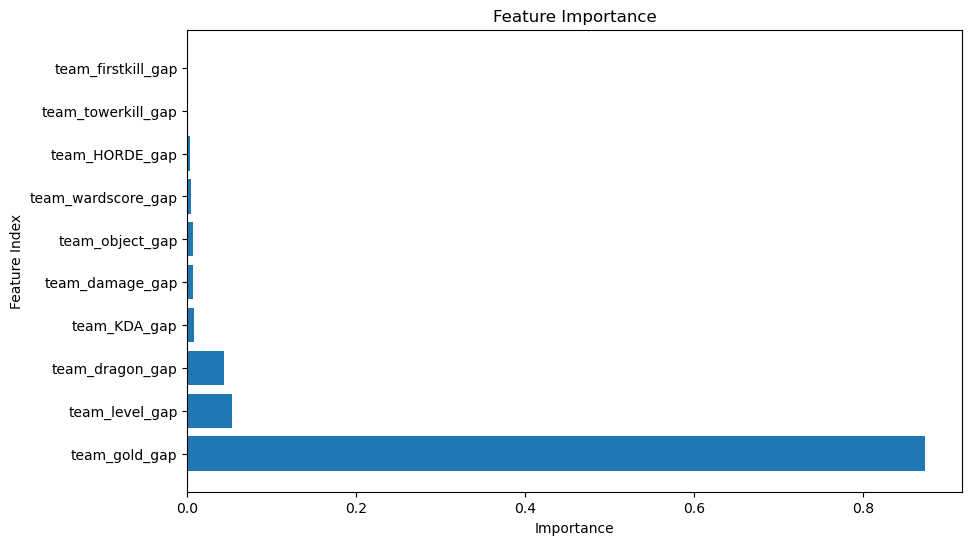

In [200]:
importances = model.feature_importances_
# 변수 중요도 내림차순으로 정렬
indices = (-importances).argsort()

# 상위 10개 변수 추출
top_features = indices[:10]
top_importances = importances[top_features]

# 막대 그래프로 변수 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_importances)), top_importances, align='center')
plt.yticks(range(len(top_importances)), match_feature.columns[top_features])
plt.xlabel('Importance')
plt.ylabel('Feature Index')
plt.title('Feature Importance')
plt.show()

###  역전에 관한 비율 알아보기 

In [81]:
# # 예측이 틀린 애들 뽑기 
# misclassified_indices = []
# for i in range(len(y_test)):
#     if y_test.iloc[i] != y_pred[i]:
#         misclassified_indices.append(i)


In [82]:
# misclassified_indices

In [83]:
# misclassified_indices_df=match.loc[misclassified_indices]
# misclassified_indices_df

In [84]:
# X_test_df=pd.DataFrame(X_test)

In [85]:
# X_test_df.columns = ['team_gold_gap','team_level_gap','team_object_gap','team_dragon_gap','team_HORDE_gap','team_firstdragon_gap','team_firstkill_gap','team_KDA_gap','team_towerkill_gap','team_wardscore_gap','team_damage_gap']

In [86]:
# X_test_df.loc[misclassified_indices]

In [87]:
# # 역전 데이터 프레임 불러오기 
# Reversal=pd.read_csv('match_Reversal.csv')

In [88]:
# Reversal1=pd.DataFrame(Reversal['Reversal'])
# Reversal1

In [89]:
# merged_df = pd.merge(misclassified_indices_df, Reversal1, left_index=True, right_index=True)
# merged_df

In [90]:
# sns.countplot(x=merged_df['Reversal'])

In [91]:
# importances = model.feature_importances_

In [92]:
# match_feature.columns[top_features]

In [93]:
# # 변수 중요도 내림차순으로 정렬
# indices = (-importances).argsort()

# # 상위 10개 변수 추출
# top_features = indices[:10]
# top_importances = importances[top_features]

# # 막대 그래프로 변수 중요도 시각화
# plt.figure(figsize=(10, 6))
# plt.barh(range(len(top_importances)), top_importances, align='center')
# plt.yticks(range(len(top_importances)), match_feature.columns[top_features])
# plt.xlabel('Importance')
# plt.ylabel('Feature Index')
# plt.title('Feature Importance')
# plt.show()

## 랜덤포레스트

In [218]:
from sklearn.ensemble import RandomForestClassifier

In [219]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print("모델 정확도:", accuracy)

모델 정확도: 0.7667634635691658


In [220]:
confusion_matrix(y_test, y_pred)

array([[3109,  849],
       [ 918, 2700]], dtype=int64)

In [221]:
precision=precision_score(y_test, y_pred)
precision

0.760777683854607

In [222]:
recall=recall_score(y_test, y_pred)
recall

0.746268656716418

In [223]:
f1=f1_score(y_test, y_pred)
f1

0.7534533277521975

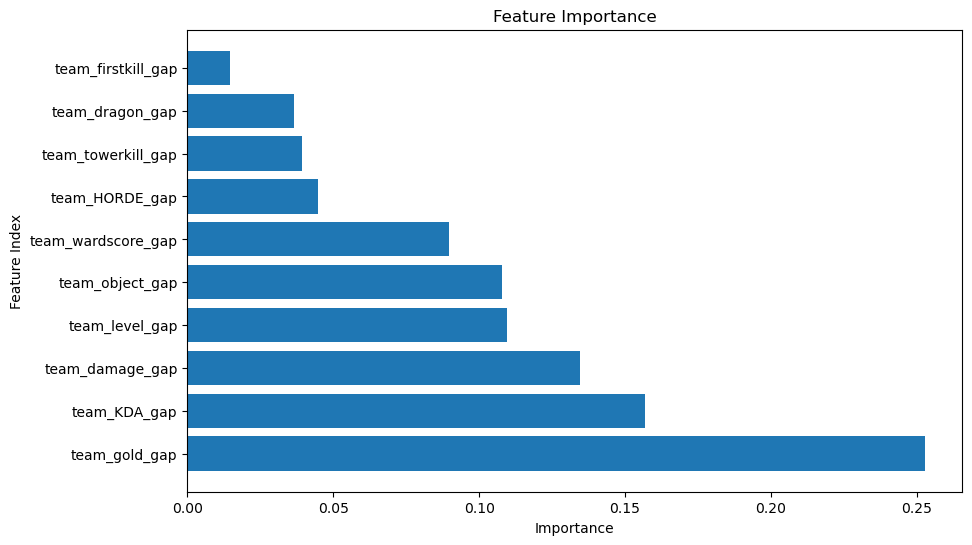

In [184]:
importances = model.feature_importances_
# 변수 중요도 내림차순으로 정렬
indices = (-importances).argsort()

# 상위 10개 변수 추출
top_features = indices[:10]
top_importances = importances[top_features]

# 막대 그래프로 변수 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_importances)), top_importances, align='center')
plt.yticks(range(len(top_importances)), match_feature.columns[top_features])
plt.xlabel('Importance')
plt.ylabel('Feature Index')
plt.title('Feature Importance')
plt.show()

LGBM

In [224]:
from lightgbm import LGBMClassifier

In [99]:
! pip install lightgbm


In [225]:
model = LGBMClassifier()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print("모델 정확도:", accuracy)

[LightGBM] [Info] Number of positive: 14626, number of negative: 15678
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1344
[LightGBM] [Info] Number of data points in the train set: 30304, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.482643 -> initscore=-0.069458
[LightGBM] [Info] Start training from score -0.069458
모델 정확도: 0.7728352692713834


In [226]:
precision=precision_score(y_test, y_pred)
precision

0.7669575007036308

In [227]:
recall=recall_score(y_test, y_pred)
recall

0.7531785516860143

In [228]:
f1=f1_score(y_test, y_pred)
f1

0.760005578022591

In [187]:
confusion_matrix(y_test, y_pred)

array([[3130,  828],
       [ 893, 2725]], dtype=int64)

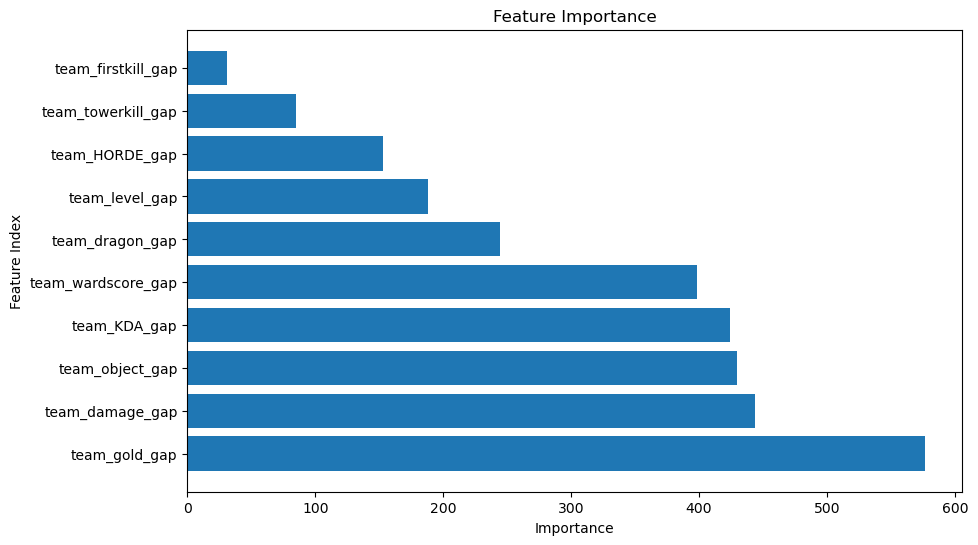

In [188]:
importances = model.feature_importances_
# 변수 중요도 내림차순으로 정렬
indices = (-importances).argsort()

# 상위 10개 변수 추출
top_features = indices[:10]
top_importances = importances[top_features]

# 막대 그래프로 변수 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_importances)), top_importances, align='center')
plt.yticks(range(len(top_importances)), match_feature.columns[top_features])
plt.xlabel('Importance')
plt.ylabel('Feature Index')
plt.title('Feature Importance')
plt.show()

## SVM

In [229]:
from sklearn.svm import SVC

In [230]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print("모델 정확도:", accuracy)

모델 정확도: 0.7723072861668426


In [203]:
confusion_matrix(y_test, y_pred)

array([[3117,  841],
       [ 884, 2734]], dtype=int64)

In [231]:
precision=precision_score(y_test, y_pred)
precision

0.7647552447552447

In [232]:
recall=recall_score(y_test, y_pred)
recall

0.7556661138750691

In [233]:
f1=f1_score(y_test, y_pred)
f1

0.7601835117475324